In [23]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pprint

In [10]:
# use inbuilt data in statsmodels
df = sm.datasets.macrodata.load_pandas().data
# print note about the data
print(sm.datasets.macrodata.NOTE)
# display head
df.head()

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [13]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

In [14]:
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


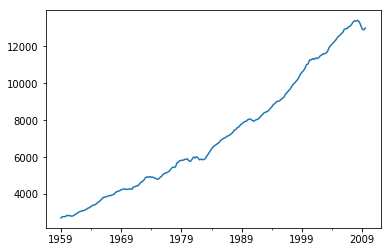

In [15]:
df['realgdp'].plot()

In [25]:
# Hodrick-Prescott filter
"""
Returns
-------
cycle : array
    The estimated cycle in the data given lamb.
trend : array
    The estimated trend in the data given lamb.
"""
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp'])

In [26]:
df['trend'] = gdp_trend

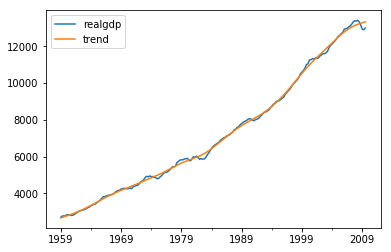

In [28]:
df[['realgdp', 'trend']].plot()

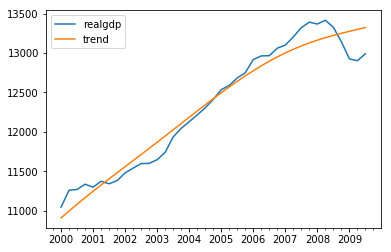

In [29]:
# zoom to specific time using slicing
df[['realgdp', 'trend']]["2000-03-31":].plot()

# EWMA Models
Exponential weighted moving average

In [30]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [31]:
airline.index # index is string

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)

In [32]:
# get rid of missing values
airline.dropna(inplace=True)

In [33]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [34]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [35]:
airline['6-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-Month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

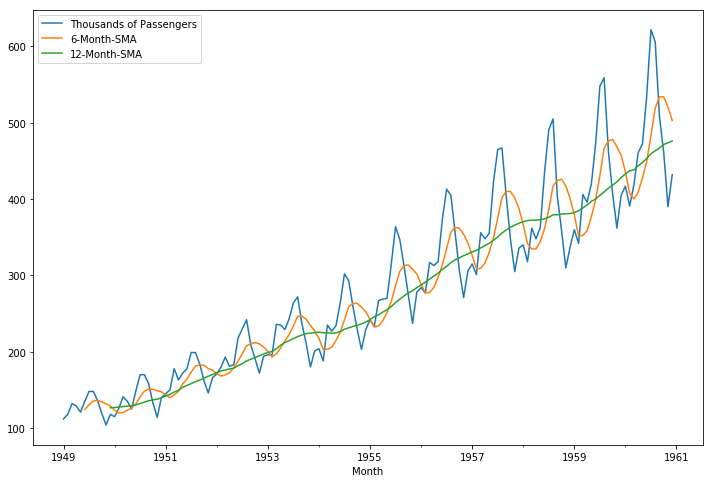

In [38]:
airline.plot(figsize=(12, 8))

In [42]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline.head()

,Thousands of Passengers,6-Month-SMA,12-Month-SMA,EWMA-12
Month,,,,
1949-01-01,112.0,NaN,NaN,112.000000
1949-02-01,118.0,NaN,NaN,115.250000
1949-03-01,132.0,NaN,NaN,121.787529
1949-04-01,129.0,NaN,NaN,124.064224
1949-05-01,121.0,NaN,NaN,123.231685


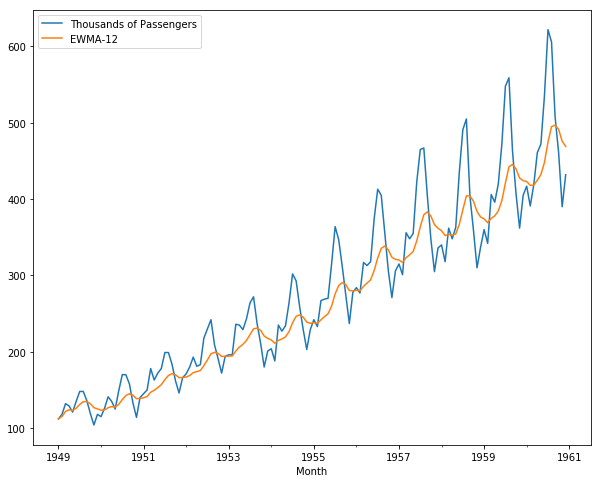

In [44]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10, 8))

# ETS Decomposition

### Imports

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
airline = pd.read_csv('airline_passengers.csv',index_col="Month")
airline.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


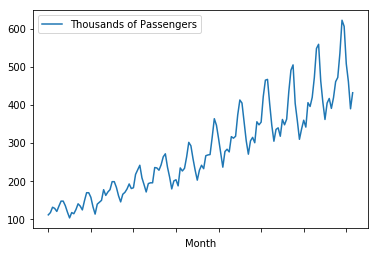

In [50]:
# look for seasonality
airline.plot()

In [51]:
# get rid of missing values
airline.dropna(inplace=True)
# indexing
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [52]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [53]:
result

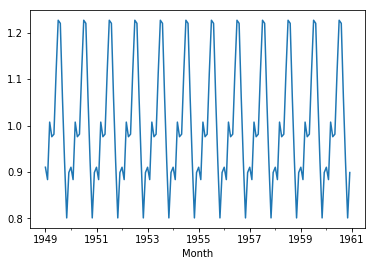

In [54]:
result.seasonal.plot()

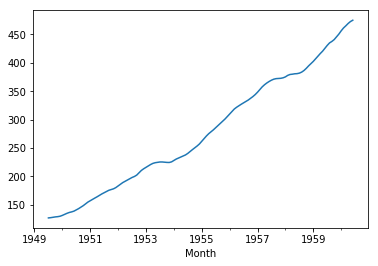

In [55]:
result.trend.plot()

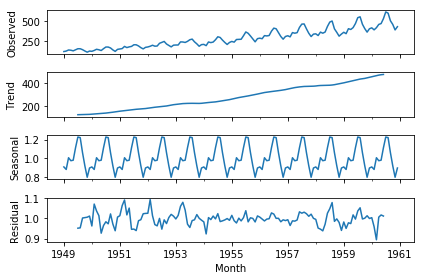

In [59]:
fig = result.plot()